### Importing necesary python packages

In [1]:
import os
import requests
import pandas as pd
import numpy as np
import contextily as cx
import geopandas as gpd
from census import Census 

### Using requests library to extract FEMA Emergency Management Performance Grant data

In [2]:
#Using an API to retrieve data from open FEMA as the data changes weekly
response = requests.get("https://www.fema.gov/api/open/v2/EmergencyManagementPerformanceGrants")
print(response.status_code)

200


### Accessing the EmergencyManagementPerformanceGrants through json format 

In [3]:
json = response.json()
json.keys()
json['metadata']
print (type(json['EmergencyManagementPerformanceGrants']))
json['EmergencyManagementPerformanceGrants'][0]

<class 'list'>


{'id': 'feba7d36-6c6c-4870-a6ba-7ae4d33d4070',
 'reportingPeriod': '2014 Close-Out',
 'state': 'Alabama',
 'legalAgencyName': 'Alabama Emergency Management Agency',
 'projectType': 'Develop/enhance plans, procedures, and protocols',
 'projectStartDate': '2014-10-01T00:00:00.000Z',
 'projectEndDate': '2016-10-01T00:00:00.000Z',
 'nameOfProgram': 'EMPG',
 'fundingAmount': 5795991}

### Converting json data to a pandas dataframe

In [4]:
empg = pd.DataFrame(json['EmergencyManagementPerformanceGrants'])
empg.head(2)

,id,reportingPeriod,state,legalAgencyName,projectType,projectStartDate,projectEndDate,nameOfProgram,fundingAmount
0,feba7d36-6c6c-4870-a6ba-7ae4d33d4070,2014 Close-Out,Alabama,Alabama Emergency Management Agency,"Develop/enhance plans, procedures, and protocols",2014-10-01T00:00:00.000Z,2016-10-01T00:00:00.000Z,EMPG,5795991.0
1,6a79936c-3e4e-4aa9-a3c4-869450a157cb,2014 Close-Out,Alaska,City and Borough of Juneau,Establish/Enhance emergency plans and procedur...,2014-07-01T00:00:00.000Z,2015-06-01T00:00:00.000Z,EMPG,110000.0


#### We see that each row has information about state level grant amount 
#### Checking which states have EMPG grants by using unique() method

In [5]:
print (len(empg.state.unique()))
print (empg.state.unique())

21
['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'District of Columbia' 'Florida' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Michigan' 'Minnesota']


### Creating a geopandas dataframe from US states boundary shapefile
#### The boundary shapefile can be downloaded from Census website

In [6]:
state = gpd.read_file('data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
state

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."
5,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05314 41.11446, -104.05245 41.2..."
6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704..."
7,72,01779808,0400000US72,72,PR,Puerto Rico,00,8868896030,4922382562,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ..."
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
9,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."


#### combining the state geodatabase columns to EMPG data using merge method

In [7]:
final = empg.merge(state, left_on = 'state', right_on = 'NAME')
final.head(2)

,id,reportingPeriod,state,legalAgencyName,projectType,projectStartDate,projectEndDate,nameOfProgram,fundingAmount,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,feba7d36-6c6c-4870-a6ba-7ae4d33d4070,2014 Close-Out,Alabama,Alabama Emergency Management Agency,"Develop/enhance plans, procedures, and protocols",2014-10-01T00:00:00.000Z,2016-10-01T00:00:00.000Z,EMPG,5795991.0,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
1,6a79936c-3e4e-4aa9-a3c4-869450a157cb,2014 Close-Out,Alaska,City and Borough of Juneau,Establish/Enhance emergency plans and procedur...,2014-07-01T00:00:00.000Z,2015-06-01T00:00:00.000Z,EMPG,110000.0,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((179.48132 51.97530, 179.58286 ..."


#### While merging the dataframes, the merged dataframe is a pandas dataframe since the left dataframe (to which data was added is a dataframe) although states is a geopandas dataframe 
#### Geometry column differentiates a pandas and geo pandas dataframe
#### state is a geodataframe and empg is a dataframe

In [8]:
#dropping unnecessary columns to reduce clutter and checking what columns we have in the dataframe 
final.drop(columns = ['STATENS', 'AFFGEOID', 'GEOID', 'LSAD', 'ALAND', 'AWATER'], inplace = True)
final.columns

Index(['id', 'reportingPeriod', 'state', 'legalAgencyName', 'projectType',
       'projectStartDate', 'projectEndDate', 'nameOfProgram', 'fundingAmount',
       'STATEFP', 'STUSPS', 'NAME', 'geometry'],
      dtype='object')

In [9]:
#converting to a geodataframe using geometry column 
final = gpd.GeoDataFrame(final, geometry = 'geometry', crs="EPSG:4629")

In [10]:
#taking states within Contiguous US (CONUS) only
#define values of state to remove area other than CONUS
values = ['02', '15', '60', '66', '69', '72', '78']

#drop rows that contain any value in the list
final = final[final.STATEFP.isin(values) == False]

In [11]:
#drop rows that contain any value in the list from state geodataframe to use only CONUS states in background map
state = state[state.STATEFP.isin(values) == False]
len (final.state.unique())

18

#### Adding state population to normalize funding amount 

### Using state method from census package to download population data from 2018 and creating a dataframe from it

In [12]:
c = Census(os.environ.get('enter your apli key'))

In [13]:
state_popn = c.acs5.state(fields = (
                            'B01001_001E'
                                    ),
                          state_fips = '*', 
                          year = 2018)

state_popn_df = pd.DataFrame(state_popn)
print (state_popn_df.shape)
state_popn_df.head(2)

(52, 2)


,B01001_001E,state
0,2988762.0,28
1,6090062.0,29


### checking datatypes of all columns in state population dataframe 

In [14]:
state_popn_df.dtypes

B01001_001E    float64
state           object
dtype: object

#### renaming columns to more intuitive names and changing datatype. Changing datatype is helpful when we are merging dataframes

In [15]:
state_popn_df = state_popn_df.rename(columns= {
                                         'B01001_001E': 'POPESTIMATE2018',
                                          'state' : 'State_fips'}
                                          )

#changing state code to str from obj type 
state_popn_df['State_fips'] = state_popn_df['State_fips'].astype('str')

#### Merging population data into EMPG dataframe

In [16]:
final = final.merge(state_popn_df, left_on = 'STATEFP', right_on = 'State_fips')
final.head()

,id,reportingPeriod,state,legalAgencyName,projectType,projectStartDate,projectEndDate,nameOfProgram,fundingAmount,STATEFP,STUSPS,NAME,geometry,POPESTIMATE2018,State_fips
0,feba7d36-6c6c-4870-a6ba-7ae4d33d4070,2014 Close-Out,Alabama,Alabama Emergency Management Agency,"Develop/enhance plans, procedures, and protocols",2014-10-01T00:00:00.000Z,2016-10-01T00:00:00.000Z,EMPG,5795991.00,01,AL,Alabama,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",4864680.0,01
1,11b9c679-fd67-41f9-aa0c-c61990109065,2014 Close-Out,Arizona,Arizona Division of Emergency Management/EMPG,Establish/enhance emergency operations center,2014-10-01T00:00:00.000Z,2016-09-01T00:00:00.000Z,EMPG,6956206.87,04,AZ,Arizona,"POLYGON ((-114.79968 32.59362, -114.80939 32.6...",6946685.0,04
2,c0e1053c-c704-498c-a287-c2883e5f2966,2014 Close-Out,Arizona,DEOBLIGATED ADEM EMPG funds,Establish / enhance sustainable Homeland Secur...,2014-10-01T00:00:00.000Z,2016-09-01T00:00:00.000Z,EMPG,15954.13,04,AZ,Arizona,"POLYGON ((-114.79968 32.59362, -114.80939 32.6...",6946685.0,04
3,dc2f0518-c016-4a52-bd20-c6d9d1fc5c6d,2014 Close-Out,Arkansas,Arkansas County Office of Emergency Management,Establish/enhance emergency operations center,2014-10-01T00:00:00.000Z,2015-09-01T00:00:00.000Z,EMPG,21373.18,05,AR,Arkansas,"POLYGON ((-94.61792 36.49941, -94.36120 36.499...",2990671.0,05
4,a43add9c-b697-4442-b007-147898df9549,2014 Close-Out,Arkansas,Arkansas Division of Emergency Management,Establish/enhance emergency operations center,2014-10-01T00:00:00.000Z,2015-09-01T00:00:00.000Z,EMPG,2792604.38,05,AR,Arkansas,"POLYGON ((-94.61792 36.49941, -94.36120 36.499...",2990671.0,05


#### Calculating funds per thousand population

In [17]:
final['EMPGfundsPerThousand'] = (final['fundingAmount']*1000)/final['POPESTIMATE2018']
final.head()

,id,reportingPeriod,state,legalAgencyName,projectType,projectStartDate,projectEndDate,nameOfProgram,fundingAmount,STATEFP,STUSPS,NAME,geometry,POPESTIMATE2018,State_fips,EMPGfundsPerThousand
0,feba7d36-6c6c-4870-a6ba-7ae4d33d4070,2014 Close-Out,Alabama,Alabama Emergency Management Agency,"Develop/enhance plans, procedures, and protocols",2014-10-01T00:00:00.000Z,2016-10-01T00:00:00.000Z,EMPG,5795991.00,01,AL,Alabama,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",4864680.0,01,1191.443425
1,11b9c679-fd67-41f9-aa0c-c61990109065,2014 Close-Out,Arizona,Arizona Division of Emergency Management/EMPG,Establish/enhance emergency operations center,2014-10-01T00:00:00.000Z,2016-09-01T00:00:00.000Z,EMPG,6956206.87,04,AZ,Arizona,"POLYGON ((-114.79968 32.59362, -114.80939 32.6...",6946685.0,04,1001.370707
2,c0e1053c-c704-498c-a287-c2883e5f2966,2014 Close-Out,Arizona,DEOBLIGATED ADEM EMPG funds,Establish / enhance sustainable Homeland Secur...,2014-10-01T00:00:00.000Z,2016-09-01T00:00:00.000Z,EMPG,15954.13,04,AZ,Arizona,"POLYGON ((-114.79968 32.59362, -114.80939 32.6...",6946685.0,04,2.296654
3,dc2f0518-c016-4a52-bd20-c6d9d1fc5c6d,2014 Close-Out,Arkansas,Arkansas County Office of Emergency Management,Establish/enhance emergency operations center,2014-10-01T00:00:00.000Z,2015-09-01T00:00:00.000Z,EMPG,21373.18,05,AR,Arkansas,"POLYGON ((-94.61792 36.49941, -94.36120 36.499...",2990671.0,05,7.146617
4,a43add9c-b697-4442-b007-147898df9549,2014 Close-Out,Arkansas,Arkansas Division of Emergency Management,Establish/enhance emergency operations center,2014-10-01T00:00:00.000Z,2015-09-01T00:00:00.000Z,EMPG,2792604.38,05,AR,Arkansas,"POLYGON ((-94.61792 36.49941, -94.36120 36.499...",2990671.0,05,933.771846


#### Plotting state level funds and funds per thousand

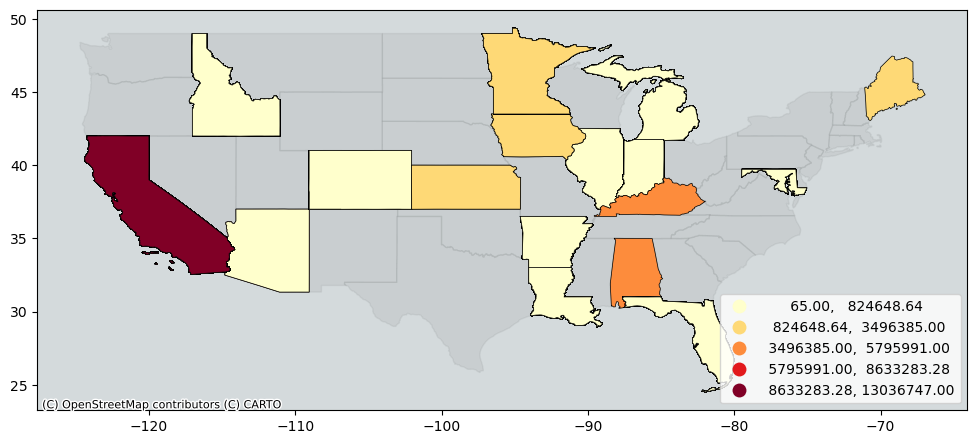

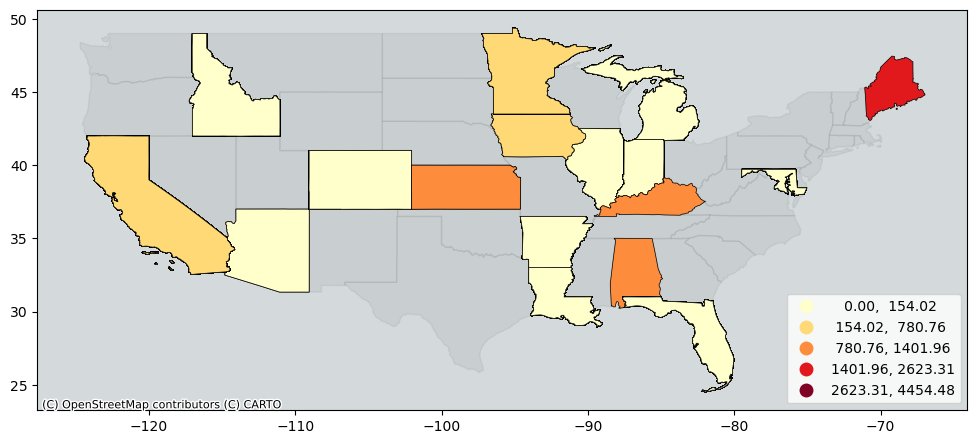

In [18]:

#plotting the amount of assistances across states
ax1 = state.plot( color='k', linewidth=1, figsize=(12,9), alpha = 0.05, edgecolor='k')
final.plot(ax = ax1, column = 'fundingAmount', scheme='FisherJenks', cmap = 'YlOrRd', linewidth= 0.5, figsize=(12,9), edgecolor='k', legend=True, legend_kwds = {'loc': 'lower right'})
cx.add_basemap(ax1, source=cx.providers.CartoDB.Positron, zoom=15)

#plotting the Emergency Management Performance grant per thousands across states
ax2 = state.plot( color='k', linewidth=1, figsize=(12,9), alpha = 0.05, edgecolor='k')
final.plot(ax = ax2, column = 'EMPGfundsPerThousand', scheme='FisherJenks', cmap = 'YlOrRd', linewidth= 0.5, figsize=(12,9), edgecolor='k', legend=True, legend_kwds = {'loc': 'lower right'})
cx.add_basemap(ax2, source=cx.providers.CartoDB.Positron, zoom=15)

#### The map shows that Emergency Management Performance Grant per thopusand population is highest in the state of Maine. Even so, mapping only the fund amount shows california receiving the highest. TFirst case is a scenario how data might mislead you. 